In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import pickle
import time

%matplotlib inline
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from collections import defaultdict, Counter

%run evaluation_functions.py

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

In [33]:
with open("pickles/LR_model.pkl", "rb") as f:
    LR = pickle.load(f)
with open("pickles/RFC_model.pkl", "rb") as f:
    RFC = pickle.load(f)
with open("pickles/XGB_model.pkl", "rb") as f:
    XGB = pickle.load(f)
with open("pickles/LGB_model.pkl", "rb") as f:
    LGB = pickle.load(f)

In [34]:
with open("pickles/X_train.pickle", "rb") as f:
    X_train = pickle.load(f)
with open("pickles/y_train.pickle", "rb") as f:
    y_train = pickle.load(f)
with open("pickles/X_test.pickle", "rb") as f:
    X_test = pickle.load(f)
with open("pickles/y_test.pickle", "rb") as f:
    y_test = pickle.load(f)

In [35]:
X_cols = X_train.columns

In [36]:
#for final XGB model
with open("pickles/X2_train.pickle", "rb") as f:
    X2_train = pickle.load(f)
with open("pickles/y2_train.pickle", "rb") as f:
    y2_train = pickle.load(f)
with open("pickles/X2_test.pickle", "rb") as f:
    X2_test = pickle.load(f)
with open("pickles/y2_test.pickle", "rb") as f:
    y2_test = pickle.load(f)

In [37]:
X2_cols = X2_train.columns

### Compare Models

In [38]:
y_pred_prob_LR = LR.predict_proba(X_train)[:,1]
y_pred_prob_RFC = RFC.predict_proba(X_train)[:,1]
y_pred_prob_XGB = XGB.predict_proba(X2_train)[:,1]

In [39]:
print(f'LR o - v4: {roc_auc_score(y_train, y_pred_prob_LR):.3f}') # XGB
print(f'RFC o - v4: {roc_auc_score(y_train, y_pred_prob_RFC):.3f}') # XGB
print(f'XGB o - v4: {roc_auc_score(y2_train, y_pred_prob_XGB):.3f}') # XGB

LR o - v4: 0.628
RFC o - v4: 0.628
XGB o - v4: 0.666


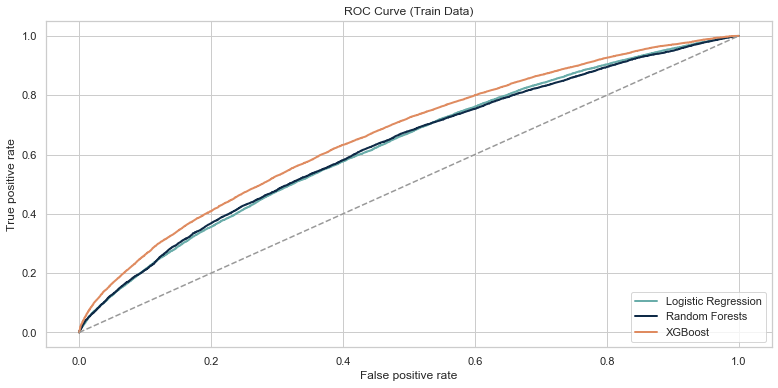

In [40]:
# Compare ROCs for:
fpr13, tpr13, thresholds13 = roc_curve(y_train, y_pred_prob_LR) # LR
fpr14, tpr14, thresholds14 = roc_curve(y_train, y_pred_prob_RFC) # RFC
fpr15, tpr15, thresholds15 = roc_curve(y2_train, y_pred_prob_XGB) # XGB


plt.figure(figsize=(13,6))

plt.plot(fpr13, tpr13,lw=2,label='Logistic Regression',c="#6aadaa")
plt.plot(fpr14, tpr14,lw=2,label='Random Forests',c="#0e2a47ff")
plt.plot(fpr15, tpr15,lw=2,label='XGBoost',c="#df8b60")
# plt.plot(fpr16, tpr16,lw=2,label='LGB o - v4')

plt.plot([0,1],[0,1],c='#999999',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (Train Data)')

plt.savefig("figures/roc_model_compare.png", bbox_inches = 'tight');

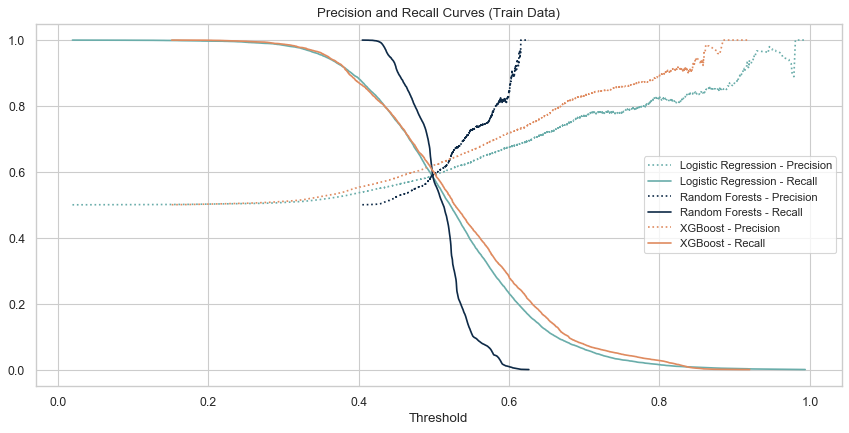

In [41]:
# Compare Precision/Recall curves
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_train, y_pred_prob_LR)
precision_curve4, recall_curve4, threshold_curve4 = precision_recall_curve(y_train, y_pred_prob_RFC)
precision_curve5, recall_curve5, threshold_curve5 = precision_recall_curve(y2_train, y_pred_prob_XGB)

plt.figure(dpi=80,figsize=(13,6))
plt.plot(threshold_curve2, precision_curve2[1:],label='Logistic Regression - Precision',color='#6aadaa',linestyle=':')
plt.plot(threshold_curve2, recall_curve2[1:], label='Logistic Regression - Recall',color='#6aadaa')
plt.plot(threshold_curve4, precision_curve4[1:],label='Random Forests - Precision',color='#0e2a47ff',linestyle=':')
plt.plot(threshold_curve4, recall_curve4[1:], label='Random Forests - Recall',color='#0e2a47ff')
plt.plot(threshold_curve5, precision_curve5[1:],label='XGBoost - Precision',color='#df8b60',linestyle=':')
plt.plot(threshold_curve5, recall_curve5[1:], label='XGBoost - Recall',color='#df8b60')
plt.legend(loc='center right',fontsize='small')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves (Train Data)')

plt.savefig("figures/p_r_model_compare.png", bbox_inches = 'tight');

### XGB models only

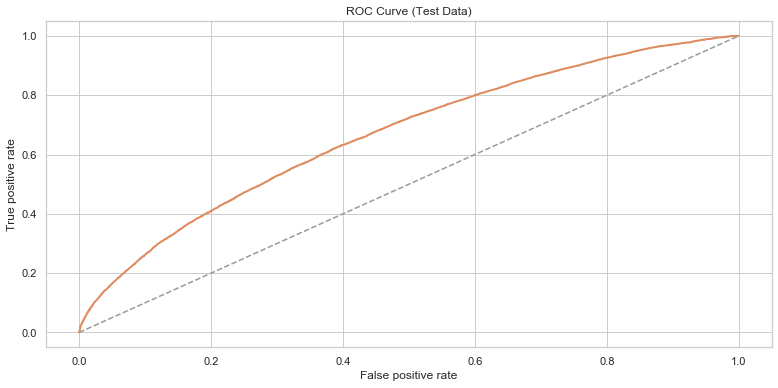

In [42]:
# Compare ROCs for:
# fpr13, tpr13, thresholds13 = roc_curve(y_train, y_pred_prob_LR) # LR
# fpr14, tpr14, thresholds14 = roc_curve(y_train, y_pred_prob_RFC) # RFC
fpr15, tpr15, thresholds15 = roc_curve(y2_train, y_pred_prob_XGB) # XGB

plt.figure(figsize=(13,6))

# plt.plot(fpr13, tpr13,lw=2,label='Logistic Regression',c="#6aadaa")
# plt.plot(fpr14, tpr14,lw=2,label='Random Forests',c="#0e2a47ff")
plt.plot(fpr15, tpr15,lw=2,label='XGBoost',c="#df8b60")
# plt.plot(fpr16, tpr16,lw=2,label='LGB o - v4')

plt.plot([0,1],[0,1],c='#999999',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

# plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (Test Data)')

plt.savefig("figures/roc_XGB.png", bbox_inches = 'tight');

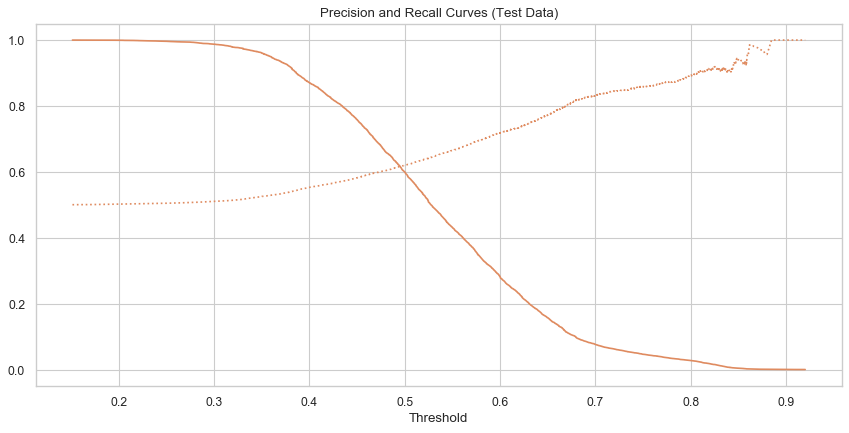

In [43]:
# Compare Precision/Recall curves
# precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_train, y_pred_prob_LR)
# precision_curve4, recall_curve4, threshold_curve4 = precision_recall_curve(y_train, y_pred_prob_RFC)
precision_curve5, recall_curve5, threshold_curve5 = precision_recall_curve(y2_train, y_pred_prob_XGB)

plt.figure(dpi=80,figsize=(13,6))
# plt.plot(threshold_curve2, precision_curve2[1:],label='Logistic Regression - Precision',color='#6aadaa',linestyle=':')
# plt.plot(threshold_curve2, recall_curve2[1:], label='Logistic Regression - Recall',color='#6aadaa')
# plt.plot(threshold_curve4, precision_curve4[1:],label='Random Forests - Precision',color='#0e2a47ff',linestyle=':')
# plt.plot(threshold_curve4, recall_curve4[1:], label='Random Forests - Recall',color='#0e2a47ff')
plt.plot(threshold_curve5, precision_curve5[1:],label='XGBoost - Precision',color='#df8b60',linestyle=':')
plt.plot(threshold_curve5, recall_curve5[1:], label='XGBoost - Recall',color='#df8b60')
# plt.legend(loc='center right',fontsize='small')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves (Test Data)')

plt.savefig("figures/p_r_XGB.png", bbox_inches = 'tight');

### Compare test performance for new patients vs not new patients

In [44]:
all_test = X2_test.copy()
all_test['target']=y2_test
all_test.head(5)

,Age2,Scholarship,Alcoholism,SMS_received,DayDiff2,Reschedule,Follow_up,prior_appt_count,prior_no_show_count,Neighbourhood2_ANDORINHAS,...,SchedDayofWeek_Friday,SchedDayofWeek_Saturday,SchedDayofWeek_Thursday,SchedDayofWeek_Tuesday,SchedDayofWeek_Wednesday,ApptDayofWeek_Friday,ApptDayofWeek_Thursday,ApptDayofWeek_Tuesday,ApptDayofWeek_Wednesday,target
46132,43,1,0,0,2,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,1
35900,30,0,0,1,4,0,0,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
1446,73,0,0,0,1,0,0,0.0,0.0,1,...,0,0,1,0,0,1,0,0,0,0
62240,83,0,0,0,1,0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
24175,16,0,0,0,4,0,0,1.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0


In [45]:
new_test = all_test.loc[all_test['prior_appt_count']==0]
exs_test = all_test.loc[all_test['prior_appt_count']>0]

In [46]:
new_test.shape

(11397, 83)

In [47]:
exs_test.shape

(6394, 83)

In [48]:
X_test_new, y_test_new = new_test.drop(['target'],axis=1),new_test['target']
X_test_exs, y_test_exs = exs_test.drop(['target'],axis=1),exs_test['target']

In [49]:
y_test_new_prob = XGB.predict_proba(X_test_new)[:,1]
y_test_exs_prob = XGB.predict_proba(X_test_exs)[:,1]
y_test_all_prob = XGB.predict_proba(X2_test)[:,1]

In [50]:
print(f'AUC New: {roc_auc_score(y_test_new, y_test_new_prob):.3f}') 
print(f'AUC Old: {roc_auc_score(y_test_exs, y_test_exs_prob):.3f}') 
print(f'AUC All: {roc_auc_score(y2_test, y_test_all_prob):.3f}') 

AUC New: 0.610
AUC Old: 0.669
AUC All: 0.633


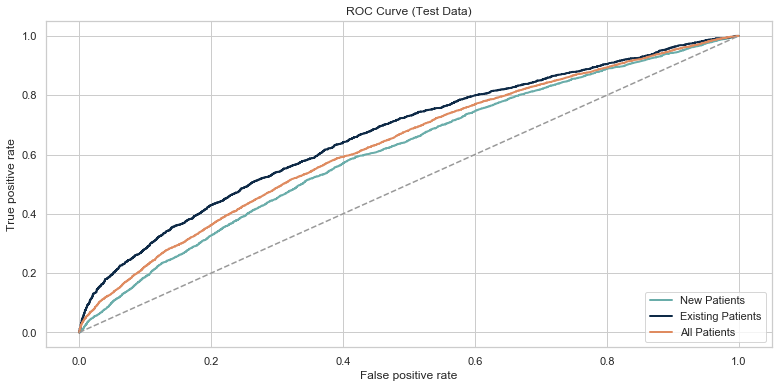

In [51]:
# Compare ROCs for:
fpr13, tpr13, thresholds13 = roc_curve(y_test_new, y_test_new_prob) # new
fpr14, tpr14, thresholds14 = roc_curve(y_test_exs, y_test_exs_prob) # exs
fpr15, tpr15, thresholds15 = roc_curve(y2_test, y_test_all_prob) # exs


plt.figure(figsize=(13,6))

plt.plot(fpr13, tpr13,lw=2,label='New Patients',c="#6aadaa")
plt.plot(fpr14, tpr14,lw=2,label='Existing Patients',c="#0e2a47ff")
plt.plot(fpr15, tpr15,lw=2,label='All Patients',c="#df8b60")
# plt.plot(fpr16, tpr16,lw=2,label='LGB o - v4')

plt.plot([0,1],[0,1],c='#999999',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (Test Data)')

plt.savefig("figures/roc_new_exs.png", bbox_inches = 'tight');

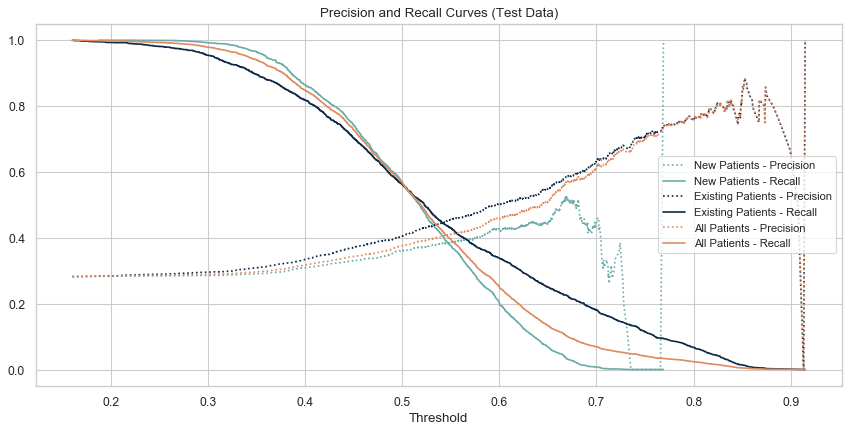

In [52]:
# Compare Precision/Recall curves
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test_new, y_test_new_prob)
precision_curve4, recall_curve4, threshold_curve4 = precision_recall_curve(y_test_exs, y_test_exs_prob)
precision_curve5, recall_curve5, threshold_curve5 = precision_recall_curve(y2_test, y_test_all_prob)

plt.figure(dpi=80,figsize=(13,6))
plt.plot(threshold_curve2, precision_curve2[1:],label='New Patients - Precision',color='#6aadaa',linestyle=':')
plt.plot(threshold_curve2, recall_curve2[1:], label='New Patients - Recall',color='#6aadaa')
plt.plot(threshold_curve4, precision_curve4[1:],label='Existing Patients - Precision',color='#0e2a47ff',linestyle=':')
plt.plot(threshold_curve4, recall_curve4[1:], label='Existing Patients - Recall',color='#0e2a47ff')
plt.plot(threshold_curve5, precision_curve5[1:],label='All Patients - Precision',color='#df8b60',linestyle=':')
plt.plot(threshold_curve5, recall_curve5[1:], label='All Patients - Recall',color='#df8b60')
plt.legend(loc='center right',fontsize='small')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves (Test Data)')

plt.savefig("figures/p_r_new_exs.png", bbox_inches = 'tight');

### Visualizations

In [53]:
LR.feature_names = X_train.columns
# LR.target_names = list(np.unique(y_train))
LR.target_names = [1,0]

In [54]:
#Logistic Regression coefficients
def plot_ovr_coefs(model):
    """Helper to plot coefficients of a ovr model like Logistic Regression"""
    n_models, n_coef = model.coef_.shape

    lod = []
    for i in range(n_models):
        for j in range(n_coef):
            lod.append({
                "OVR Model": f"{model.target_names[i]} vs rest",
                "Coefficient Name": f"{model.feature_names[j]}",
                "Coefficient Value": model.coef_[i,j]
            })
    coef_df = pd.DataFrame(lod).sort_values('Coefficient Value',ascending=False)
#     return coef_df.head(5)
    plt.figure(figsize=(15,15))
    sns.barplot(y="Coefficient Name", x="Coefficient Value", hue="OVR Model", orient="h", data=coef_df)
    return coef_df

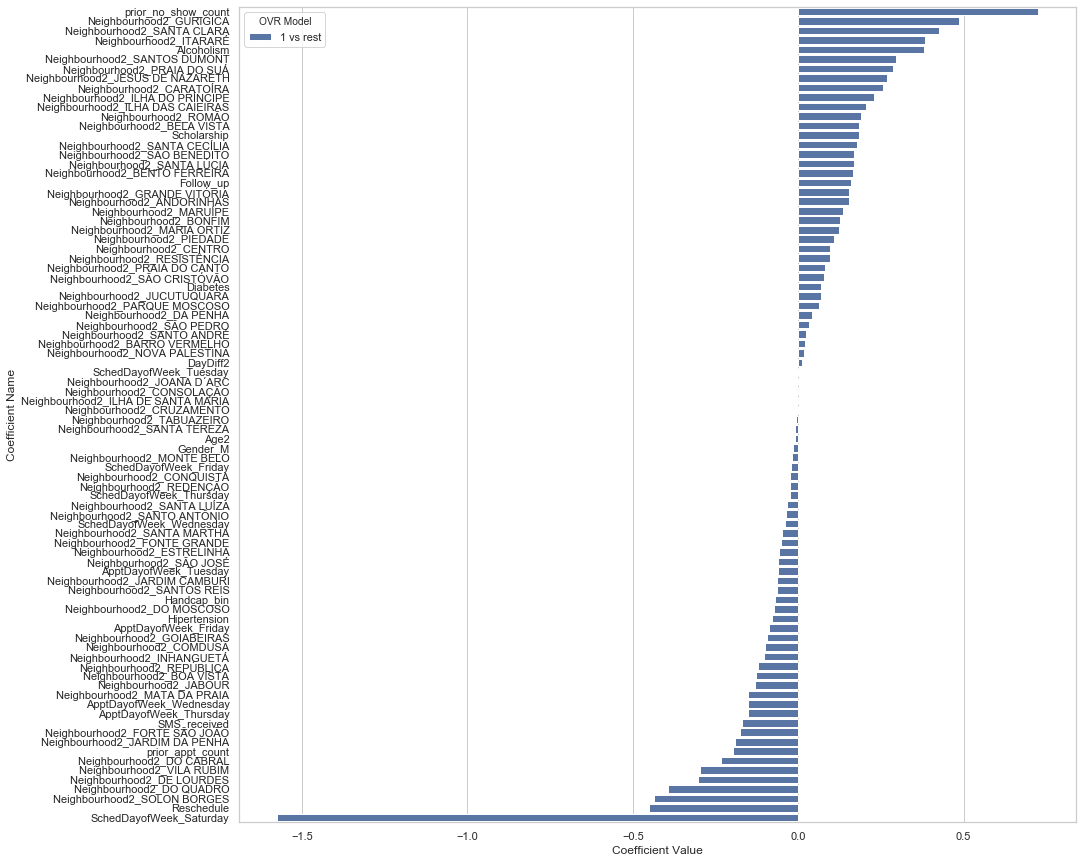

In [55]:
# let's plot the coefficients to demonstrate that the model and what it has learned are preserved through pickling
LR_df = plot_ovr_coefs(LR)

In [57]:
LR_df['test']= [x[0:14] != 'Neighbourhood2' for x in LR_df['Coefficient Name']]
LR_df2 = LR_df[['OVR Model','Coefficient Name','Coefficient Value']].loc[LR_df['test']]
LR_df2['Coefficients'] = ['Prior No-Show Count','Alcoholism','Public Assistance','Follow-Up','Diabetes',
                          'Days btwn Sched/Appt','Scheduled on a Tuesday','Age','Gender','Scheduled on a Friday',
                          'Scheduled on a Thursday','Scheduled on a Wednesday','Tuesday Appointment',
                          'Handicap/Disability','Hypertension','Friday Appointment','Wednesday Appointment',
                          'Thursday Appointment','Receives SMS','Prior Appointment Count',
                          'Reschedule','Scheduled on a Saturday'
                          ] 
LR_df2

,OVR Model,Coefficient Name,Coefficient Value,Coefficients
11,1 vs rest,prior_no_show_count,0.724750,Prior No-Show Count
4,1 vs rest,Alcoholism,0.381148,Alcoholism
1,1 vs rest,Scholarship,0.183305,Public Assistance
9,1 vs rest,Follow_up,0.158833,Follow-Up
3,1 vs rest,Diabetes,0.070013,Diabetes
7,1 vs rest,DayDiff2,0.011013,Days btwn Sched/Appt
80,1 vs rest,SchedDayofWeek_Tuesday,0.002525,Scheduled on a Tuesday
0,1 vs rest,Age2,-0.008927,Age
12,1 vs rest,Gender_M,-0.015810,Gender
77,1 vs rest,SchedDayofWeek_Friday,-0.022932,Scheduled on a Friday


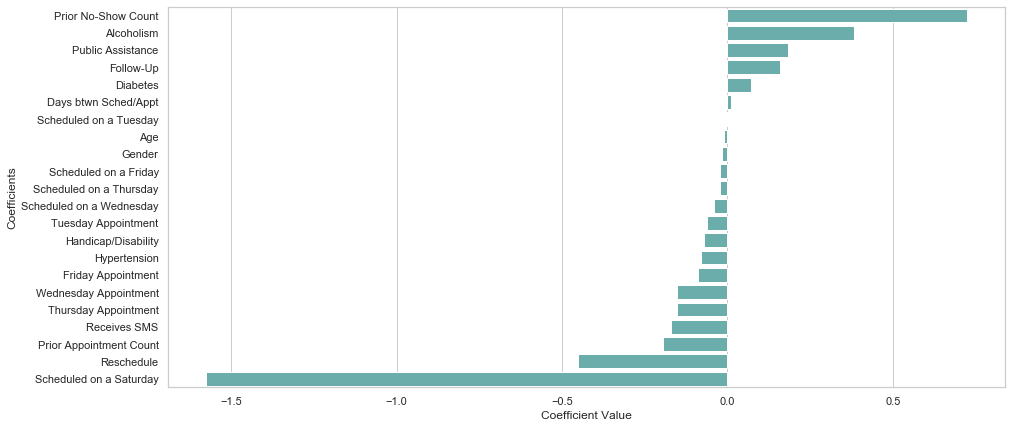

In [58]:
plt.figure(figsize=(15,7))
sns.barplot(y="Coefficients", x="Coefficient Value", orient="h", data=LR_df2,
            color='#6aadaa',saturation=1)

plt.savefig("figures/LR_coefs.png", bbox_inches = 'tight');

In [59]:
# plot feature importance

XGB.feature_names = X2_train.columns
XGB.target_names = [1,0]

def plot_ovr_fi(model):
    """Helper to plot feature importances"""
    
    n_fi = model.feature_importances_.shape[0]

    lod = []
    for j in range(n_fi):
        lod.append({
            "OVR Model": f"{model.target_names[0]} vs rest",
            "Feature Name": f"{model.feature_names[j]}",
            "Feature Importance Value": model.feature_importances_[j]
        })
    fi_df = pd.DataFrame(lod).sort_values('Feature Importance Value',ascending=False)
#     return coef_df.head(5)
    plt.figure(figsize=(15,15))
    sns.barplot(y="Feature Name", x="Feature Importance Value", hue="OVR Model", orient="h", data=fi_df)
    return fi_df

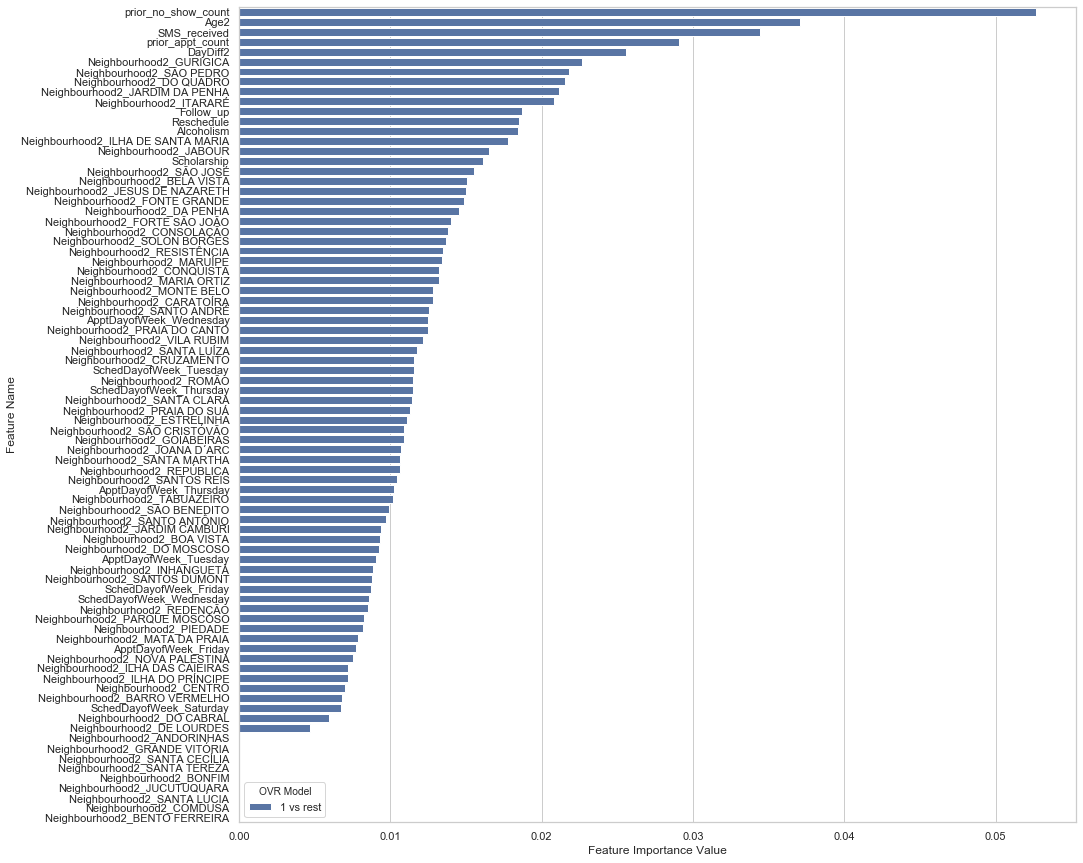

In [60]:
XGB_df = plot_ovr_fi(XGB)

In [61]:
XGB_df['test']= [x[0:14] != 'Neighbourhood2' for x in XGB_df['Feature Name']]
XGB_df2 = XGB_df[['OVR Model','Feature Name','Feature Importance Value']].loc[XGB_df['test']]
#clean columns
XGB_df2['Features'] = ['Prior No-Show Count','Age','Receives SMS','Prior Appointment Count','Days btwn Sched/Appt',
                          'Follow-Up','Reschedule','Alcoholism','Public Assistance','Wednesday Appointment',
                          'Scheduled on a Tuesday','Scheduled on a Thursday','Thursday Appointment',
                           'Tuesday Appointment','Scheduled on a Friday','Scheduled on a Wednesday',
                           'Friday Appointment','Scheduled on a Saturday'
                          ] 
XGB_df2

,OVR Model,Feature Name,Feature Importance Value,Features
8,1 vs rest,prior_no_show_count,0.052672,Prior No-Show Count
0,1 vs rest,Age2,0.037096,Age
3,1 vs rest,SMS_received,0.034412,Receives SMS
7,1 vs rest,prior_appt_count,0.029071,Prior Appointment Count
4,1 vs rest,DayDiff2,0.025593,Days btwn Sched/Appt
6,1 vs rest,Follow_up,0.018735,Follow-Up
5,1 vs rest,Reschedule,0.018483,Reschedule
2,1 vs rest,Alcoholism,0.018443,Alcoholism
1,1 vs rest,Scholarship,0.016109,Public Assistance
81,1 vs rest,ApptDayofWeek_Wednesday,0.012493,Wednesday Appointment


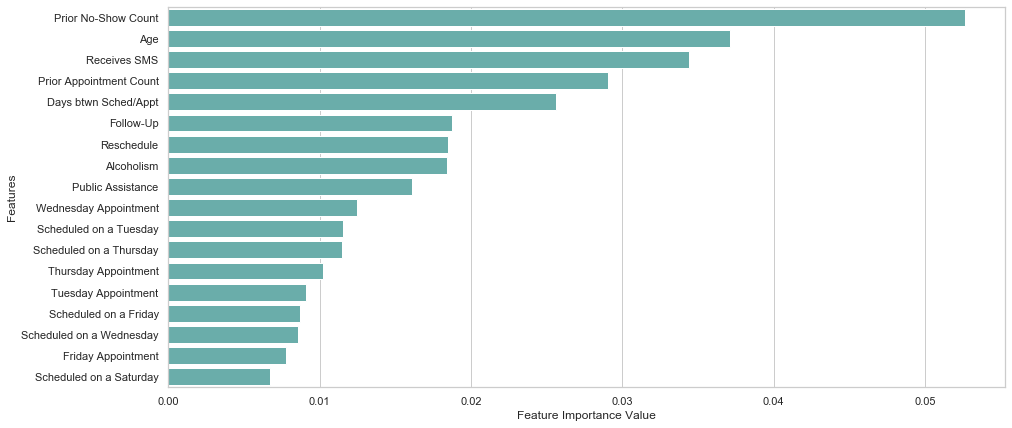

In [62]:
plt.figure(figsize=(15,7))
sns.barplot(y="Features", x="Feature Importance Value", orient="h", data=XGB_df2,
           color='#6aadaa',saturation=1)

plt.savefig("figures/XGB_feature_importance.png", bbox_inches = 'tight');